In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/heart_failure_clinical_records_dataset.csv')

df.shape

(299, 13)

In [ ]:

df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Text(0.5, 1.0, 'Null Values in Data Frame')

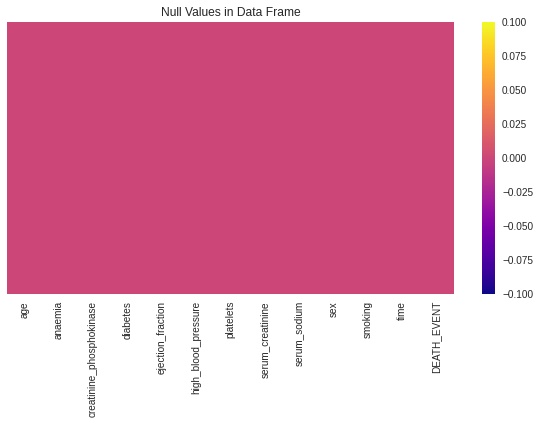

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), yticklabels = False, cmap = 'plasma')
plt.title('Null Values in Data Frame')

In [ ]:
missing_value_count = (df.isnull().sum())
print(missing_value_count[missing_value_count > 0])
total_cells = np.product(df.shape)
total_missing_value = missing_value_count.sum()
print('Percentage of missing value in Data Frame is:', total_missing_value / total_cells*100)
print('Total number of our cells is:', total_cells)
print('Total number of our missing value is:', total_missing_value)

Series([], dtype: int64)
Percentage of missing value in Data Frame is: 0.0
Total number of our cells is: 3887
Total number of our missing value is: 0


In [ ]:
data_eda = df.copy()

data_eda["sex"]                 = df["sex"] .map({1: "Male", 0: "Female"})
data_eda["diabetes"]            = df["diabetes"].map({1: "Yes", 0: "No"})
data_eda["anaemia"]             = df["anaemia"].map({1: "Yes", 0: "No"})
data_eda["high_blood_pressure"] = df["high_blood_pressure"].map({1: "Yes", 0: "No"})
data_eda["smoking"]             = df["smoking"].map({1: "Yes" , 0: "No"})
data_eda["DEATH_EVENT"]         = df["DEATH_EVENT"].map({1: "Yes", 0: "No"})

# Exploratory Data Analysis(EDA)

In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [ ]:
def pie_graph(df,title,values):   
    labels = df[values].value_counts().index
    values = df[values].value_counts()

    fig = go.Figure(data = [
        go.Pie(
        labels = labels,
        values = values,
        hole = .5)
    ])

    fig.update_layout(title_text = title)
    fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


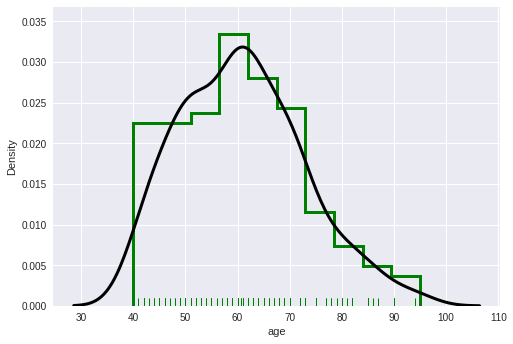

In [ ]:
ax = sns.distplot(df['age'], rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

In [ ]:
pie_graph(data_eda,"Age Group Distribution",'age group')

In [ ]:
pie_graph(data_eda, 'Gender Distribution','sex')

In [ ]:
pie_graph(data_eda, 'Anaemia Distribution','anaemia')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



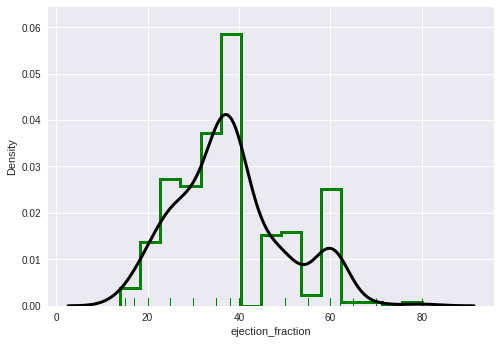

In [ ]:
ax = sns.distplot(df['ejection_fraction'], rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



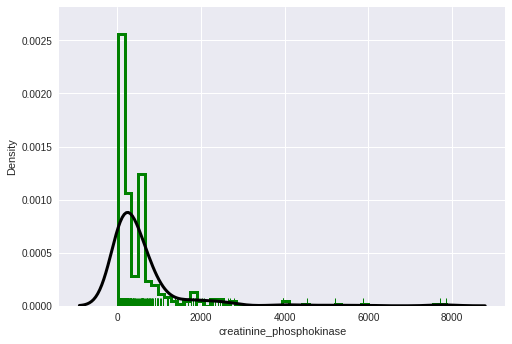

In [ ]:
ax = sns.distplot(df['creatinine_phosphokinase'], rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

In [ ]:
pie_graph(data_eda, 'Diabetes Distribution','diabetes')

In [ ]:
pie_graph(data_eda, 'Smoking  Distribution','smoking')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



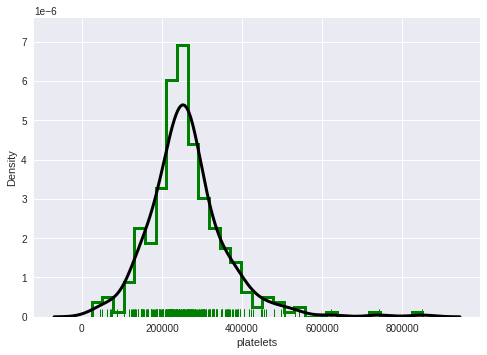

In [ ]:
ax = sns.distplot(df['platelets'], rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

In [ ]:
pie_graph(data_eda, 'DEATH EVENT  Distribution','DEATH_EVENT')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



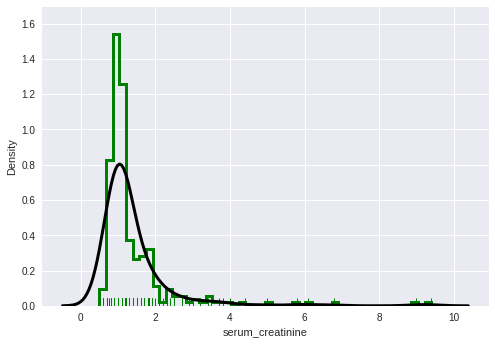

In [ ]:
ax = sns.distplot(df['serum_creatinine'], rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

In [ ]:
pie_graph(data_eda, 'high blood pressure Distribution','high_blood_pressure')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



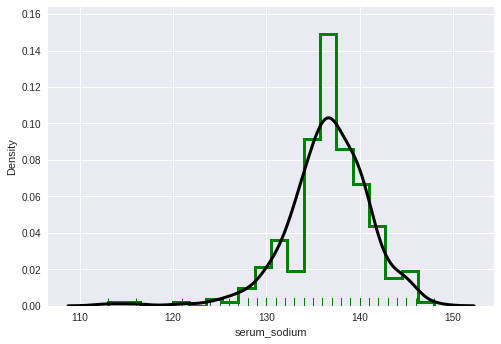

In [ ]:
ax = sns.distplot(df['serum_sodium'], rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



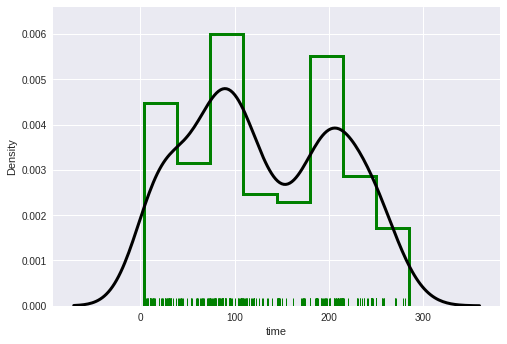

In [ ]:
ax = sns.distplot(df['time'], rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

In [ ]:
df.corr()["DEATH_EVENT"].sort_values(ascending = False)

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

# Pre Modeling Steps

In [ ]:
X = df.drop(columns = ["DEATH_EVENT"])
y = df["DEATH_EVENT"]

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Split data into separate training and test set<a id=11></a></p>
</div>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = .2,
                                                    random_state = 777)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((239, 12), (239,), (60, 12), (60,))

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Feature Scaling<a id=11></a></p>
</div>

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Apply Machine Learning Models

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Build Random Forest Classifier
and evaluate the model<a id=11></a></p>
</div>

In [ ]:
clf_rf = RandomForestClassifier(random_state=777)
clf_rf = clf_rf.fit(X_train,y_train)
y_pred_rf = clf_rf.predict(X_test)
acc = accuracy_score(y_test, y_pred_rf)
print('Testing-set Accuracy score is:', acc)
print('Training-set Accuracy score is:',accuracy_score(y_train,clf_rf.predict(X_train)))
cm = confusion_matrix(y_test, y_pred_rf)


Testing-set Accuracy score is: 0.8333333333333334
Training-set Accuracy score is: 1.0


<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Build Ada Boost Classifier
and evaluate the model<a id=11></a></p>
</div>

In [ ]:
abc = AdaBoostClassifier(n_estimators = 50,
                         learning_rate = 1, 
                         random_state = 777)
abc.fit(X_train,y_train)
y_pred_abc = abc.predict(X_test)
acc = accuracy_score(y_test, y_pred_abc)
print('AdaBoost Classifier Model Accuracy is:',acc)
cm = confusion_matrix(y_test, y_pred_abc)


AdaBoost Classifier Model Accuracy is: 0.8


<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Build Gradient Boosting Classifier
and evaluate the model<a id=11></a></p>
</div>

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
acc = accuracy_score(y_test, gb_pred)
print("Gradient Boosting Classifier Model Accuracy score is:", acc)
cm = confusion_matrix(y_test, gb_pred)


Gradient Boosting Classifier Model Accuracy score is: 0.8833333333333333


<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Build KNN Model 
and evaluate the model<a id=11></a></p>
</div>

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
acc = knn.score(X_test, y_test)
print("KNN Model Acuuracy is:", acc)
cm = confusion_matrix(y_test, knn_pred)


KNN Model Acuuracy is: 0.8333333333333334


<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Build SVC Model
and evaluate the model<a id=11></a></p>
</div>

In [ ]:
svc = SVC(random_state = 777)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
acc = svc.score(X_test, y_test)
print("SVC Accuracy score is:", acc)
cm = confusion_matrix(y_test, svc_pred)


SVC Accuracy score is: 0.8666666666666667


<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Build Logistic Regression Model
and evaluate the model<a id=11></a></p>
</div>

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
acc = lr.score(X_test, y_test)
print("LogisticRegression accuracy score is:",acc)
report = classification_report(y_test, lr_pred)
print(report)

LogisticRegression accuracy score is: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        45
           1       0.73      0.73      0.73        15

    accuracy                           0.87        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.87      0.87      0.87        60



<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Build Decision Tree Classifier
and evaluate the model<a id=11></a></p>
</div>

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
acc = accuracy_score(y_test, dt_pred)
print("Decision Tree accuracy score is :",acc)
cm = confusion_matrix(y_test, dt_pred)


Decision Tree accuracy score is : 0.7333333333333333


In [ ]:
cbc = CatBoostClassifier( iterations=10,learning_rate=0.0001 )
cbc = cbc.fit(X_train,y_train)
cbc_pred = cbc.predict(X_test)
acc = accuracy_score(y_test,cbc_pred)
print("Cat Boost Classifier accuracy score is:",acc)
cm = confusion_matrix(y_test,cbc_pred)


0:	learn: 0.6931202	total: 47.4ms	remaining: 427ms
1:	learn: 0.6930862	total: 49.2ms	remaining: 197ms
2:	learn: 0.6930573	total: 51.9ms	remaining: 121ms
3:	learn: 0.6930274	total: 54.4ms	remaining: 81.6ms
4:	learn: 0.6929965	total: 58.7ms	remaining: 58.7ms
5:	learn: 0.6929697	total: 60ms	remaining: 40ms
6:	learn: 0.6929348	total: 61.3ms	remaining: 26.3ms
7:	learn: 0.6928994	total: 65.8ms	remaining: 16.4ms
8:	learn: 0.6928645	total: 67.7ms	remaining: 7.52ms
9:	learn: 0.6928315	total: 70.2ms	remaining: 0us
Cat Boost Classifier accuracy score is: 0.8666666666666667


<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Build Voting Classifier
and evaluate the model<a id=11></a></p>
</div>

In [ ]:
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Voting Classifier Accuracy Score is: ")
print(accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)


Voting Classifier Accuracy Score is: 
0.8833333333333333
